**Imports and Settings**

In [1]:
import functions as f
import numpy as np

sims = 100000
player_count = 5

**Player Class**

In [2]:
class Player:

    def __init__(self, hand=None):
        # Allow for preset hands
        self.hand = hand if hand is not None else []
        self.show_rank = 0
        self.strength = []


    def draw(self, deck):
        # Draw 2 cards
        self.hand.append(deck.pop())
        self.hand.append(deck.pop())

        # Return updated deck
        return deck
    

    def evaluate(self, table):
        # Make dicts arranged by ranks and suits
        cards = table + self.hand
        ranks = {}
        suits = {}
        for rank, suit in cards:
            if rank not in ranks:
                ranks[rank] = []
            ranks[rank].append(suit)
            if suit not in suits:
                suits[suit] = []
            suits[suit].append(rank)
        
        self.show_rank, self.strength = f.evaluate_hand(cards, ranks, suits)

**All Hand Evaluation**

In [3]:
# Reset stat matrices
us_app = np.zeros((13, 13), dtype=int)
us_win = np.zeros((13, 13), dtype=int)
s_app = np.zeros((13, 13), dtype=int)
s_win = np.zeros((13, 13), dtype=int)
wintype = np.zeros(10)

for sim in range(sims):
    # Reset Deck, Players, Table, and Showdown
    deck = f.reset_deck()
    players = [Player() for _ in range(player_count)]
    table = []
    showdown = {}

    # Each Player Draws 2 Cards
    for player in players:
        deck = player.draw(deck)

    # Draw 5 Table Cards
    for _ in range(5):
        table.append(deck.pop())

    # Showdown Cards
    winners = f.determine_winner(table, players)
    f.print_winner(players, winners, sim, sims)

    # Update Stats
    us_app, us_win, s_app, s_win, wintype = f.update_stats(players, winners, us_app, us_win, s_app, s_win, wintype)
    

Player 0 Wins with a Two Pair, 4s over 2s with Ace Kicker (0.0%)
Players 0, 1 and 4 Tie with a Straight, 7 High (1.0%)
Player 2 Wins with a Two Pair, Jacks over 5s with King Kicker (2.0%)
Player 0 Wins with a Pair of 7s, with Jack-5-4 Kicker (3.0%)
Players 0, 1 and 4 Tie with a Straight, 10 High (4.0%)
Players 1 and 3 Tie with a Pair of Jacks, with King-10-8 Kicker (5.0%)
Player 1 Wins with a Flush, Ace High (6.0%)
Players 1 and 3 Tie with a Straight, Jack High (7.0%)
Player 4 Wins with Trip Aces, King-Queen Kicker (8.0%)
Player 2 Wins with a Full House, 8s over 7s (9.0%)
Player 0 Wins with a Straight, 7 High (10.0%)
Player 3 Wins with a Flush, Jack High (11.0%)
Player 3 Wins with a Two Pair, 10s over 4s with Queen Kicker (12.0%)
Player 1 Wins with a Two Pair, Kings over 6s with Ace Kicker (13.0%)
Player 1 Wins with a Two Pair, Jacks over 10s with Queen Kicker (14.0%)
Player 4 Wins with a Two Pair, Kings over 3s with Jack Kicker (15.0%)
Players 3 and 4 Tie with a Two Pair, 9s over 5s w

**Output Results**

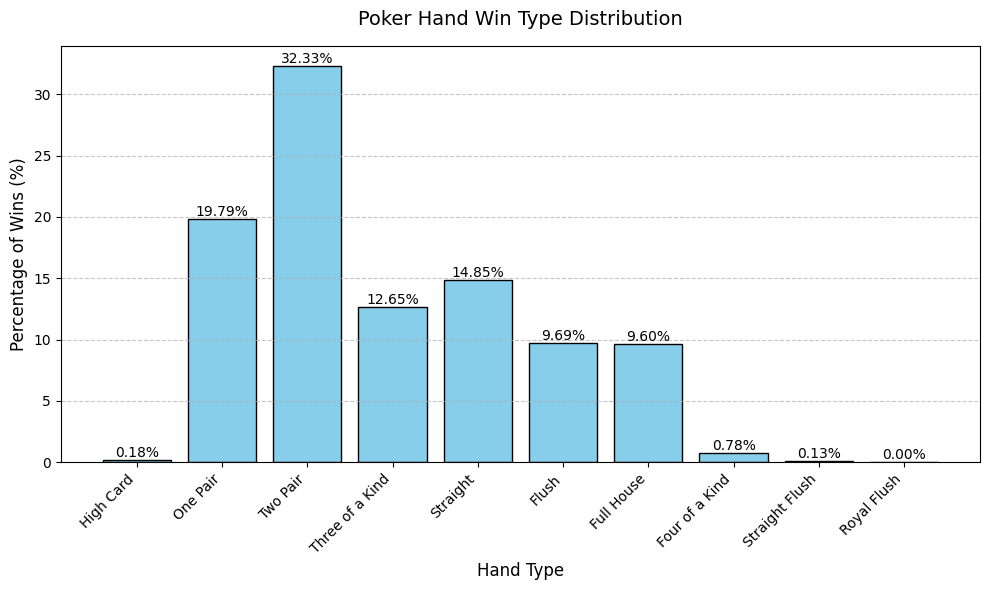

0.5720543144984669


In [7]:
f.plot_wintype(wintype, sims)

print(us_win[12][12]/us_app[12][12])